## Lead Scoring case study

#### Importing Necessary Libraries

In [1]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# for ML
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

## Data Loading

In [2]:
df=pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df["Converted"].unique()

array([0, 1], dtype=int64)

In [5]:
# As you can Converted column has tw values namely 0 and 1

In [6]:
# There are 9240 records and 37 columns
df.shape

(9240, 37)

In [7]:
# Checking the number of columns, its data type and number of NOT NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking percentage of NULL/missing values
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Data Cleaning

In [9]:
# Checking number of rows and columns
df.shape

(9240, 37)

In [10]:
# Converting 'Select' values to NaN
df = df.replace('Select', np.nan)

In [11]:
# List out the Unique values in the data set
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
# Dropping the columns that have value as 1

df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content",
         "Get updates on DM Content","I agree to pay the amount through cheque"],  axis = 1, inplace = True)

In [13]:
# Also the columns "Prospect ID" is continuous variables and can be dropped

df.drop(["Prospect ID"], axis = 1, inplace = True)

In [14]:
# Drop the column tag as it is derived by sales team

df.drop(["Tags"], axis = 1, inplace = True)

In [15]:
# making lead number as index
df = df.set_index('Lead Number')

## Missing Values

In [16]:
# Select percentage of missing values
100*df.isnull().mean()

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [17]:
# Drop the columns that have more than 40% null/missing values

df.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 
         'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1,inplace=True)


In [18]:
# Select percentage of missing values
100*df.isnull().mean()

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [19]:
# Show number of rows and columns
df.shape

(9240, 22)

## Categorical columns analysis

In [20]:
# Checking different values of column Country
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Italy                      2
Belgium                    2
Ghana                      2
China                      2
Philippines                2
Uganda                     2
Tanzania                   1
Russia                     1
Indonesia                  1
Malaysia                   1
Denmark                    1
Liberia                    1
Kenya         

In [21]:
# India is the most occuring country. So Null can be replaced with "India"
df["Country"] = df["Country"].replace(np.nan,'India')

In [22]:
# Again check if above replace has worked or not.
df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Italy                      2
Belgium                    2
Ghana                      2
China                      2
Philippines                2
Uganda                     2
Tanzania                   1
Russia                     1
Indonesia                  1
Malaysia                   1
Denmark                    1
Liberia                    1
Kenya         

In [23]:
# Set value of Country as "Other Country" when country value is other than India

df["Country"] = [ 'India' if val == 'India' else 'Outside India' for val in df["Country"] ]

In [24]:
# Check the percentage of Country values.
100 * df['Country'].value_counts()/df['Country'].value_counts().sum()

India            96.893939
Outside India     3.106061
Name: Country, dtype: float64

In [25]:
# Number of rows having India is very high in country column, so dropping this column.
df.drop(['Country'],axis=1,inplace=True)

In [26]:
# Checking percentage of NULL/missing values
100*df.isnull().mean().sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [27]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
# Mumbai is the most occuring city, we can replace missing values with Mumbai
df['City']=df['City'].replace(np.nan,'Mumbai')

In [29]:
df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
# Checking the values of 'Specialization' column
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [31]:
# As "Finance Management" is the most occuring value, replacing this with "Not Available"/missing values.
df['Specialization']=df['Specialization'].replace(np.nan,'Finance Management')

In [32]:
# Checking the values of 'Specialization' column
df['Specialization'].value_counts()

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [33]:

# Check the values of column ''What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
# Drop the column "What matters most to you in choosing a course" as its single value "Better Career Prospects" occurance is very high

df.drop('What matters most to you in choosing a course', axis = 1,inplace=True)

In [35]:
# Check the values of column 'What is your current occupation'

df['What is your current occupation'].value_counts() 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
# As unemployed is the highest occuring value, replacing NULL values with this value

df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

In [37]:
# Check the values of column 'Last Activity'

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [38]:
# As "Email Opened" is the highest occuring value, replacing NULL values with this value

df['Last Activity']=df['Last Activity'].replace(np.nan,'Email Opened')

In [39]:
# Check the values of column 'Lead Source'

df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

In [40]:
# As "Google" is the highest occuring value, replacing NULL values with this value

df['Lead Source']=df['Lead Source'].replace(np.nan,'Google')

# Also as Google and google are same, replacing google with Google

df['Lead Source']=df['Lead Source'].replace('google','Google')

In [41]:
# Checking percentage of NULL/missing values
100*df.isnull().mean().sort_values(ascending = False)

TotalVisits                               1.482684
Page Views Per Visit                      1.482684
Last Notable Activity                     0.000000
A free copy of Mastering The Interview    0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
Last Activity                             0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Search                                    0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations                   0.000000
City                                      0.000000
Lead Origin                    

In [42]:
# Checking the stat for TotalVisits 

df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

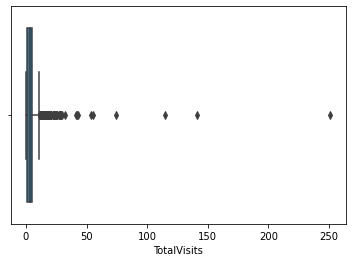

In [43]:
# Plotting box plot

sns.boxplot(df['TotalVisits'])

In [44]:
# There is outlier in TotalVisits. So we need to use median to replace missing values.
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [45]:
# Checking the stat for TotalVisits 

df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

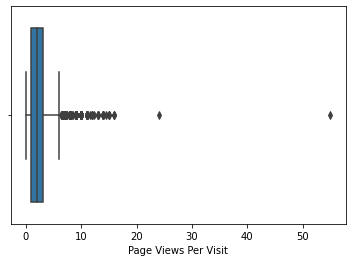

In [46]:
# Plotting box plot

sns.boxplot(df['Page Views Per Visit'])

In [47]:
# There is outlier in TotalVisits. So we need to use median to replace missing values.
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [48]:
# Checking percentage of NULL/missing values
100*df.isnull().mean().sort_values(ascending = False)

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
Lead Origin                               0.0
dtype: float64

In [49]:
# Now all the missing values have been imputed

In [50]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null

## EDA

In [52]:
id_cols=["Lead Number"]
cont_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
cat_cols=["Converted","Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Specialization",
         "What is your current occupation","Search","Newspaper Article","X Education Forums","Newspaper",
         "Digital Advertisement","Through Recommendations","City","A free copy of Mastering The Interview","Last Notable Activity"]
target=["Converted"]

### Univaraite Analysis

TotalVisits


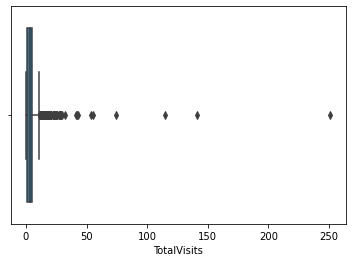

Total Time Spent on Website


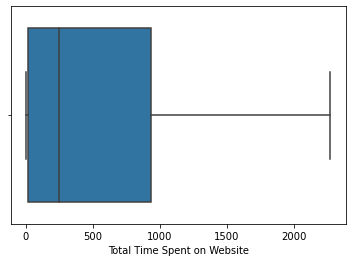

Page Views Per Visit


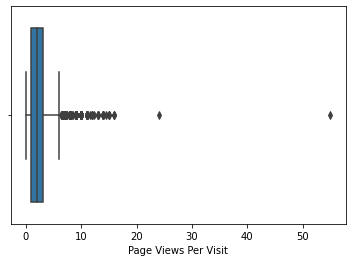

In [53]:
# Boxplot for continuoua columns
for i in cont_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

TotalVisits


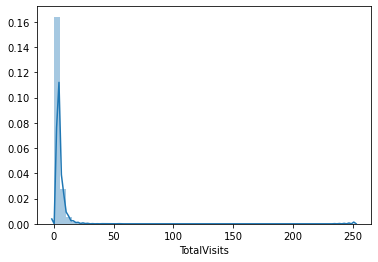

Total Time Spent on Website


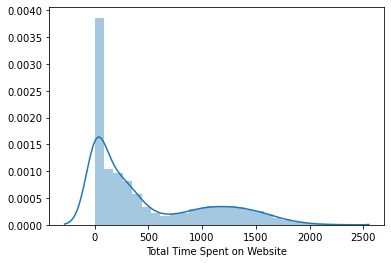

Page Views Per Visit


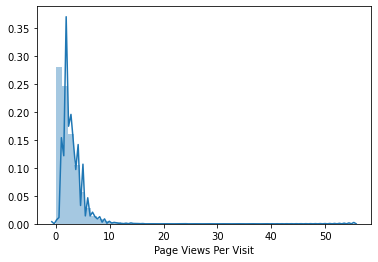

In [54]:
# Distplot for continuos columns
for i in cont_cols:
    print(i)
    sns.distplot(df[i])
    plt.show()

Converted


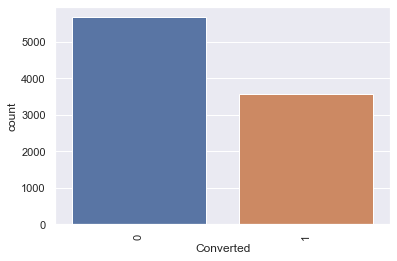

Lead Origin


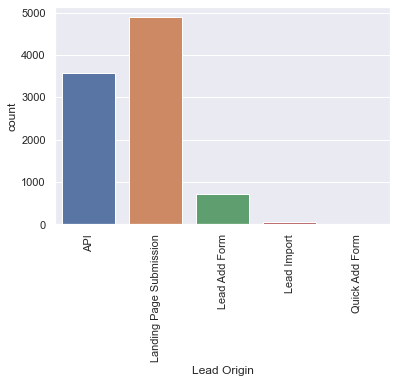

Lead Source


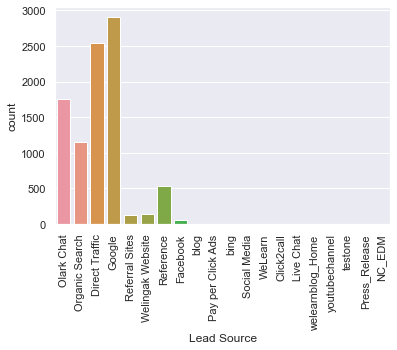

Do Not Email


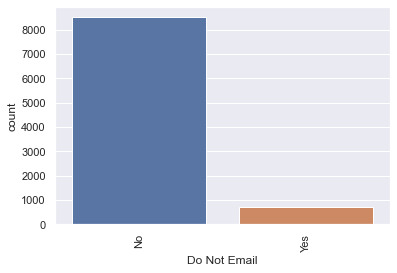

Do Not Call


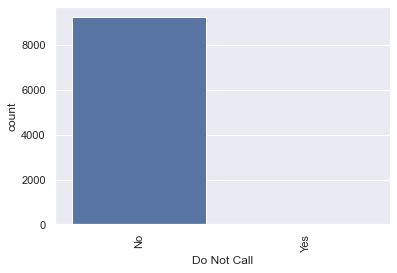

Last Activity


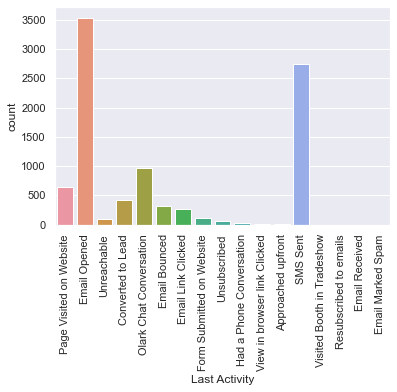

Specialization


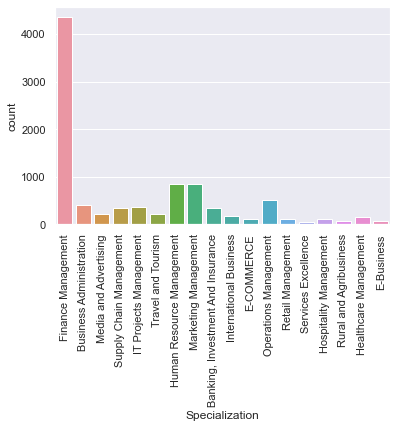

What is your current occupation


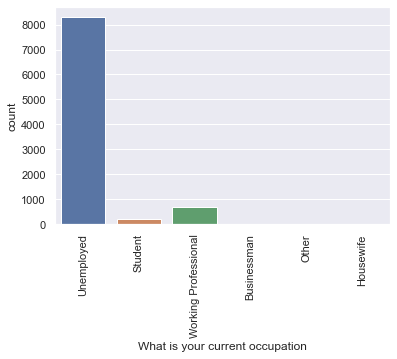

Search


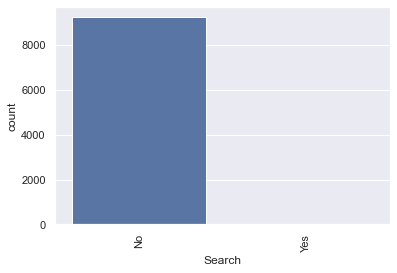

Newspaper Article


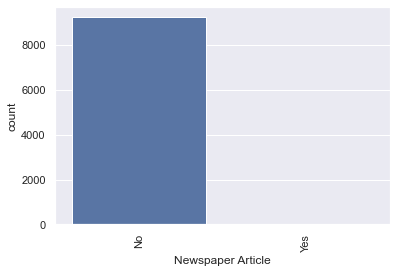

X Education Forums


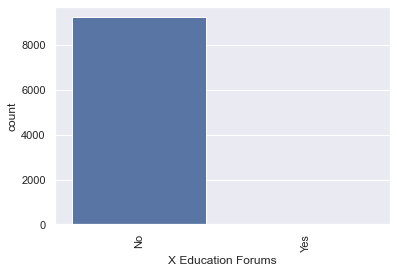

Newspaper


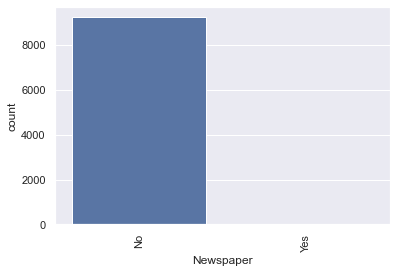

Digital Advertisement


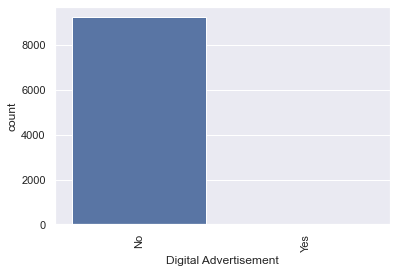

Through Recommendations


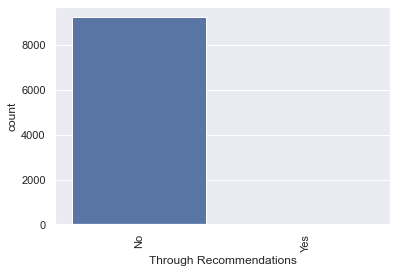

City


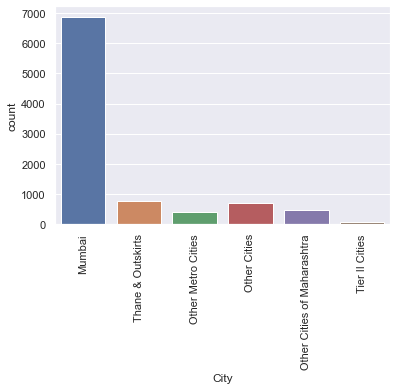

A free copy of Mastering The Interview


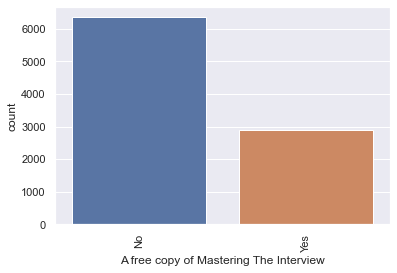

Last Notable Activity


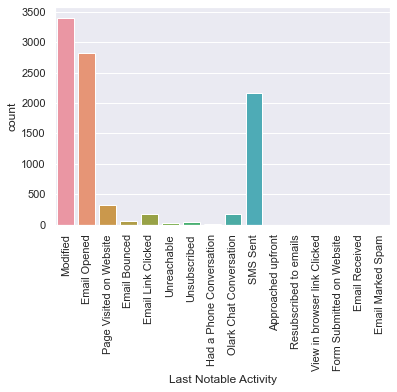

In [55]:
# Count plot for categorical columns
for i in cat_cols:
    print(i)
    sns.set()
    plt.subplots_adjust(wspace=.2,hspace=1 )
    sns.countplot(df[i]).tick_params(axis='x', rotation = 90)
    plt.show()

### Bivariate Analysis

Boxplot TotalVisits Vs Converted


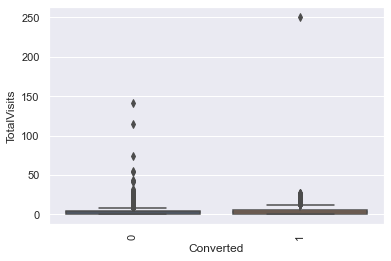

Boxplot TotalVisits Vs Lead Origin


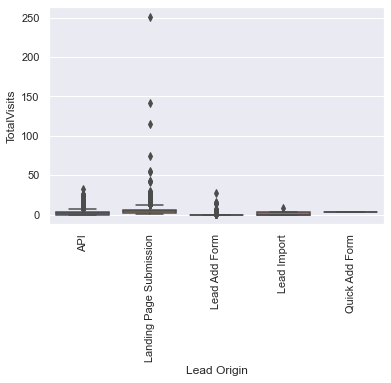

Boxplot TotalVisits Vs Lead Source


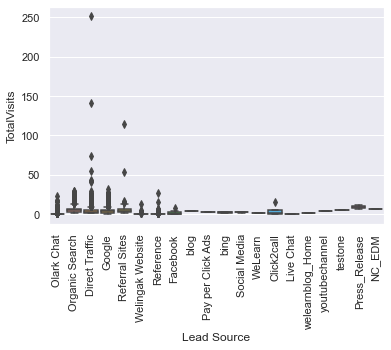

Boxplot TotalVisits Vs Do Not Email


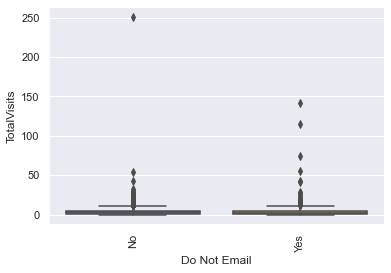

Boxplot TotalVisits Vs Do Not Call


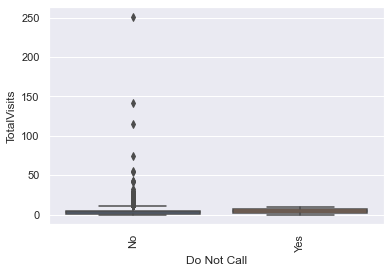

Boxplot TotalVisits Vs Last Activity


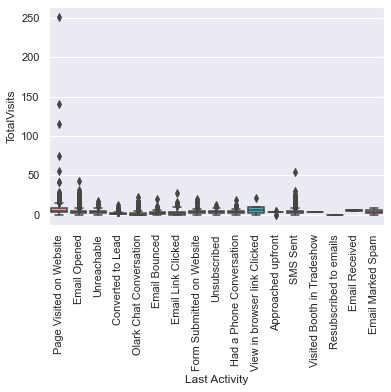

Boxplot TotalVisits Vs Specialization


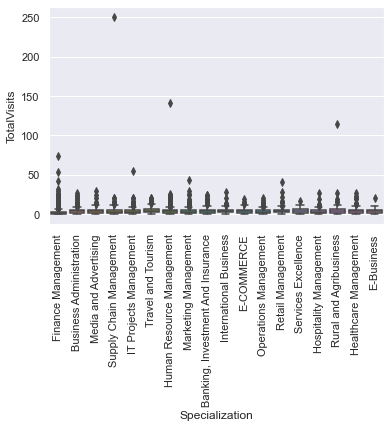

Boxplot TotalVisits Vs What is your current occupation


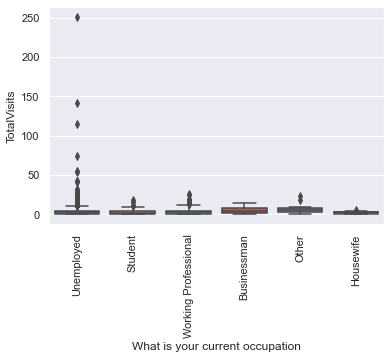

Boxplot TotalVisits Vs Search


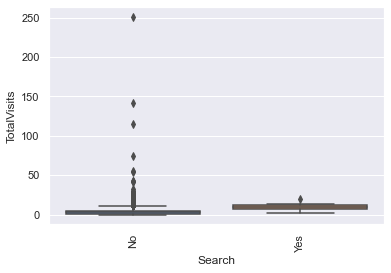

Boxplot TotalVisits Vs Newspaper Article


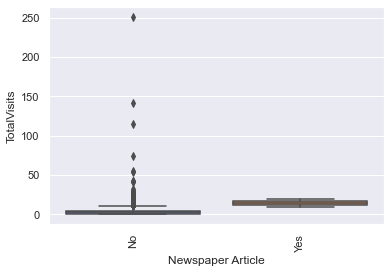

Boxplot TotalVisits Vs X Education Forums


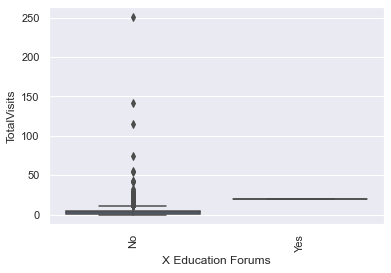

Boxplot TotalVisits Vs Newspaper


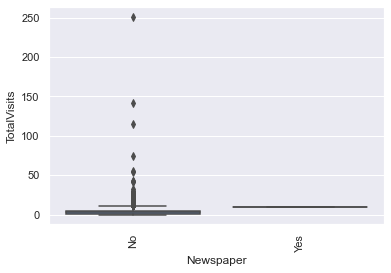

Boxplot TotalVisits Vs Digital Advertisement


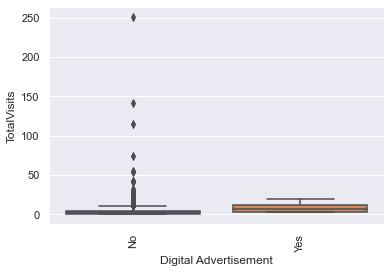

Boxplot TotalVisits Vs Through Recommendations


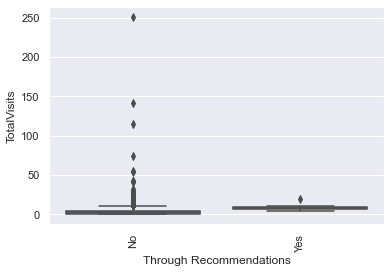

Boxplot TotalVisits Vs City


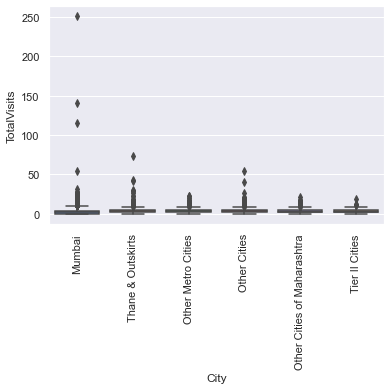

Boxplot TotalVisits Vs A free copy of Mastering The Interview


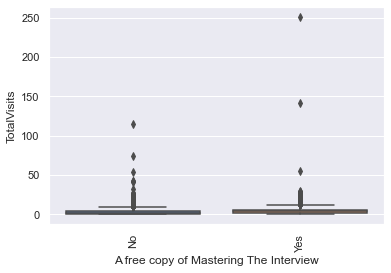

Boxplot TotalVisits Vs Last Notable Activity


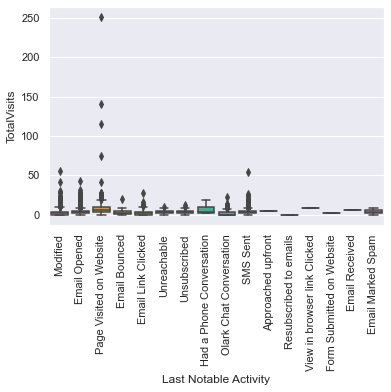

Boxplot Total Time Spent on Website Vs Converted


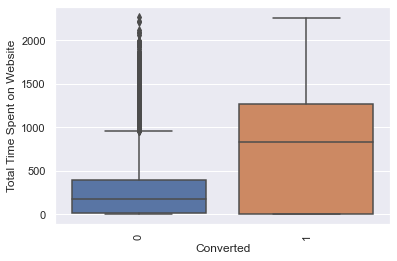

Boxplot Total Time Spent on Website Vs Lead Origin


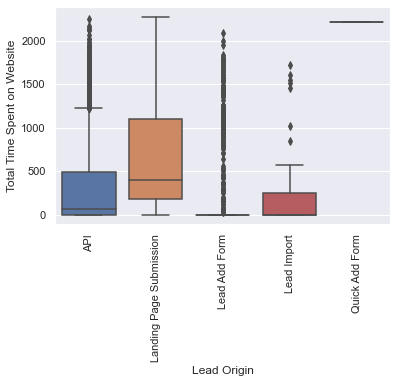

Boxplot Total Time Spent on Website Vs Lead Source


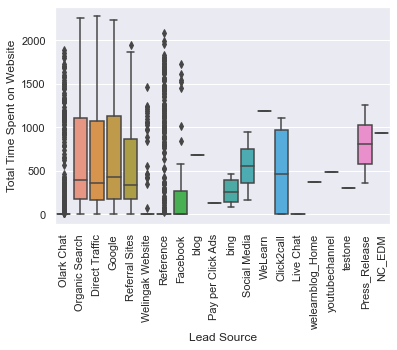

Boxplot Total Time Spent on Website Vs Do Not Email


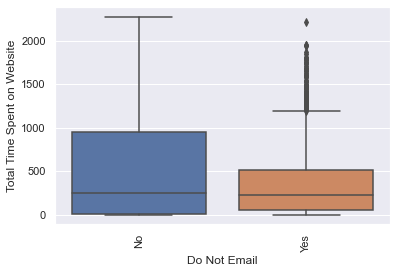

Boxplot Total Time Spent on Website Vs Do Not Call


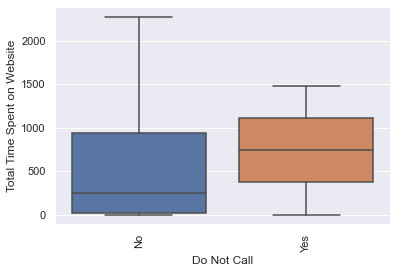

Boxplot Total Time Spent on Website Vs Last Activity


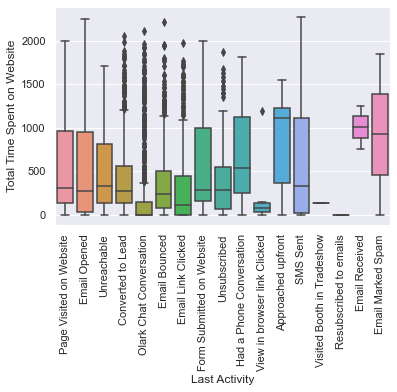

Boxplot Total Time Spent on Website Vs Specialization


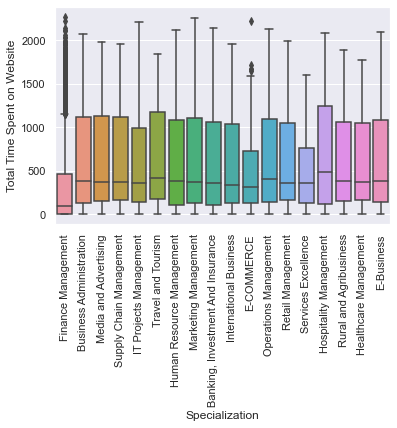

Boxplot Total Time Spent on Website Vs What is your current occupation


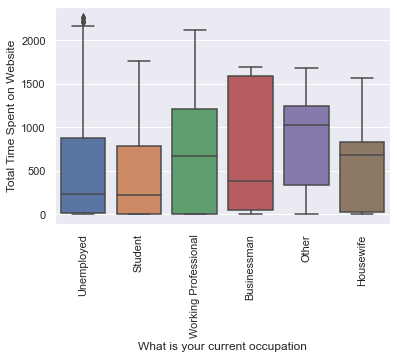

Boxplot Total Time Spent on Website Vs Search


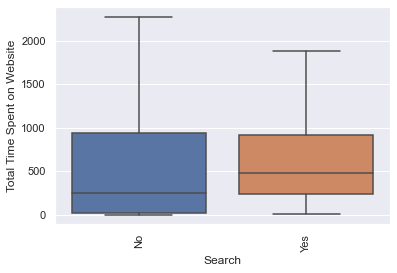

Boxplot Total Time Spent on Website Vs Newspaper Article


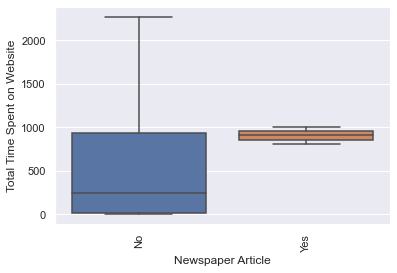

Boxplot Total Time Spent on Website Vs X Education Forums


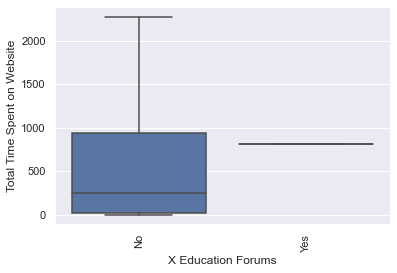

Boxplot Total Time Spent on Website Vs Newspaper


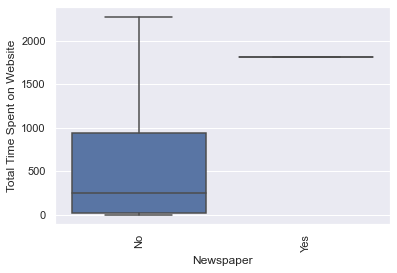

Boxplot Total Time Spent on Website Vs Digital Advertisement


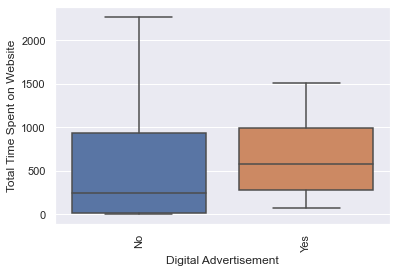

Boxplot Total Time Spent on Website Vs Through Recommendations


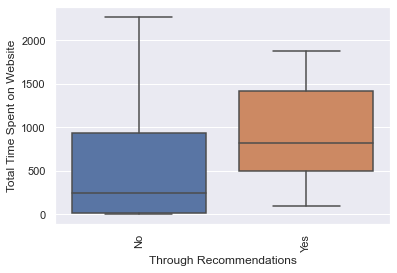

Boxplot Total Time Spent on Website Vs City


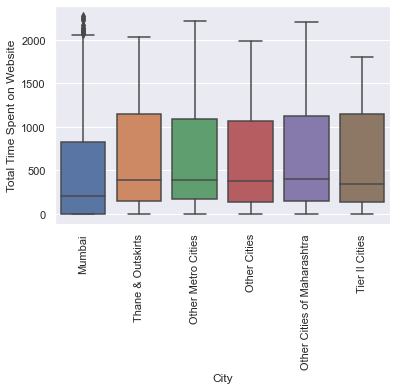

Boxplot Total Time Spent on Website Vs A free copy of Mastering The Interview


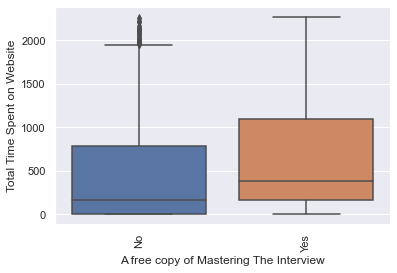

Boxplot Total Time Spent on Website Vs Last Notable Activity


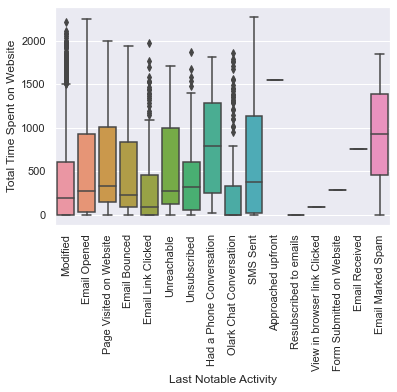

Boxplot Page Views Per Visit Vs Converted


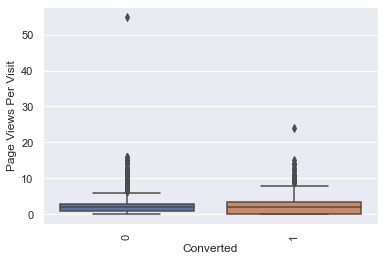

Boxplot Page Views Per Visit Vs Lead Origin


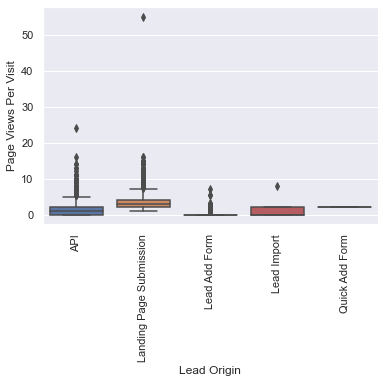

Boxplot Page Views Per Visit Vs Lead Source


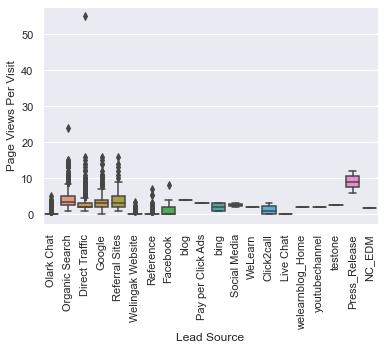

Boxplot Page Views Per Visit Vs Do Not Email


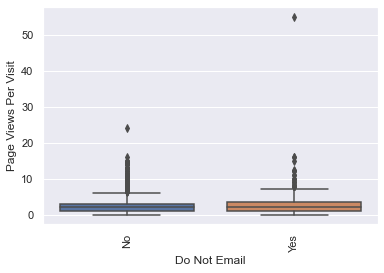

Boxplot Page Views Per Visit Vs Do Not Call


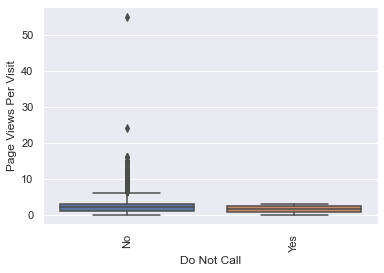

Boxplot Page Views Per Visit Vs Last Activity


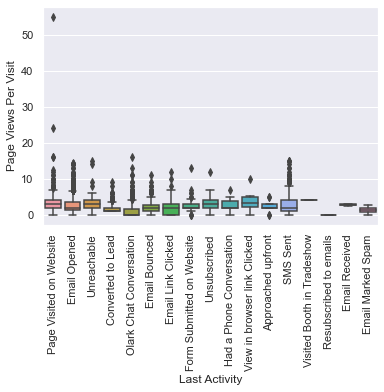

Boxplot Page Views Per Visit Vs Specialization


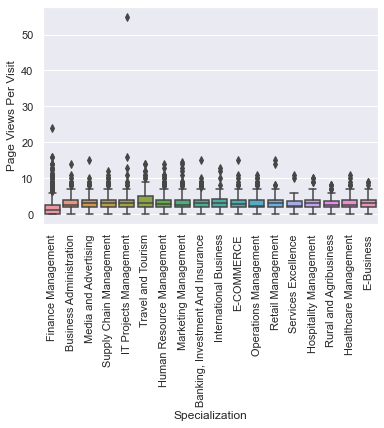

Boxplot Page Views Per Visit Vs What is your current occupation


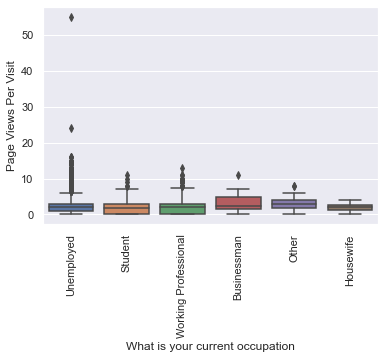

Boxplot Page Views Per Visit Vs Search


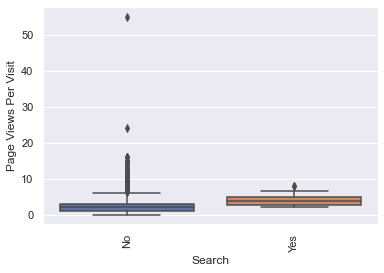

Boxplot Page Views Per Visit Vs Newspaper Article


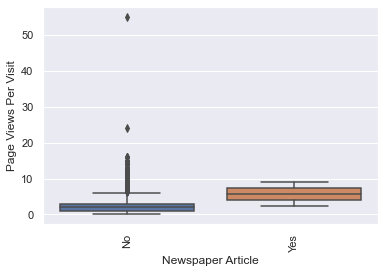

Boxplot Page Views Per Visit Vs X Education Forums


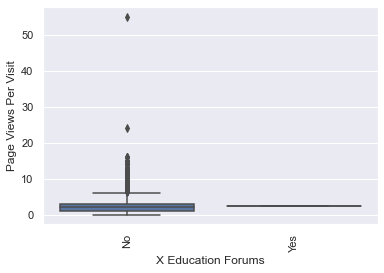

Boxplot Page Views Per Visit Vs Newspaper


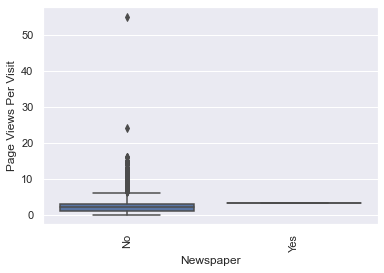

Boxplot Page Views Per Visit Vs Digital Advertisement


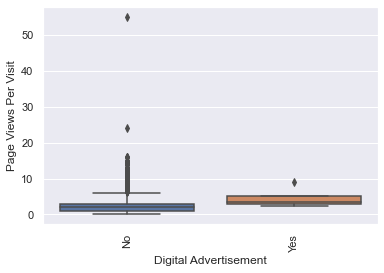

Boxplot Page Views Per Visit Vs Through Recommendations


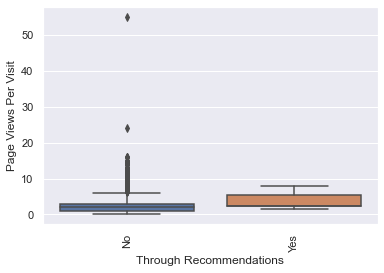

Boxplot Page Views Per Visit Vs City


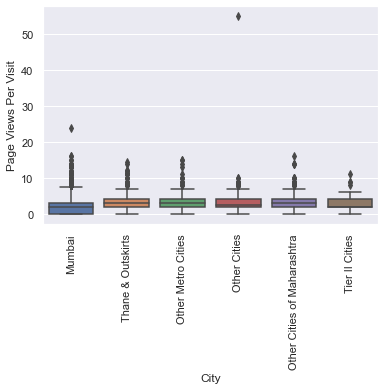

Boxplot Page Views Per Visit Vs A free copy of Mastering The Interview


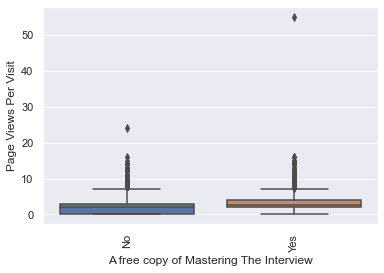

Boxplot Page Views Per Visit Vs Last Notable Activity


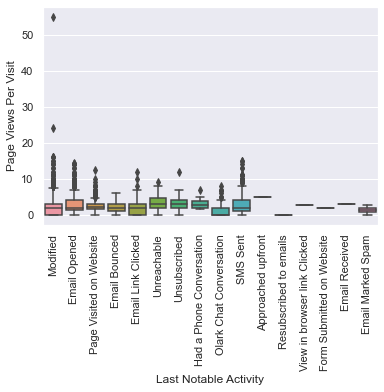

In [56]:
# Box plot for continuous columns V/S categorical columns
for i in cont_cols:
    for j in cat_cols:
        print("Boxplot",i,"Vs",j)
        sns.boxplot(df[j],df[i]).tick_params(axis='x', rotation = 90)
        plt.show()

ScatterPlot TotalVisits Vs Total Time Spent on Website


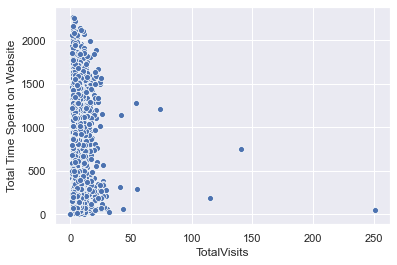

ScatterPlot TotalVisits Vs Page Views Per Visit


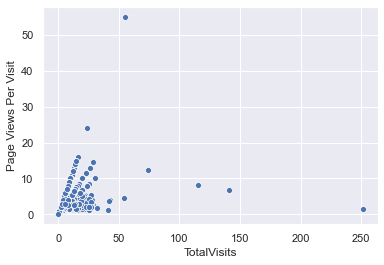

ScatterPlot Total Time Spent on Website Vs TotalVisits


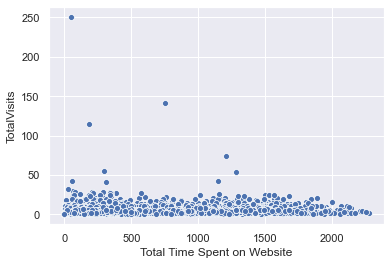

ScatterPlot Total Time Spent on Website Vs Page Views Per Visit


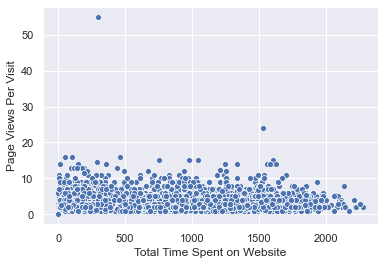

ScatterPlot Page Views Per Visit Vs TotalVisits


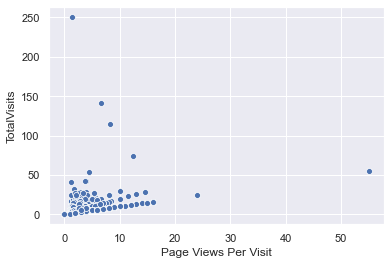

ScatterPlot Page Views Per Visit Vs Total Time Spent on Website


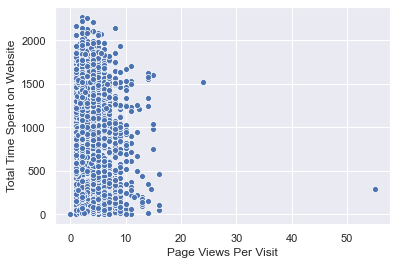

In [57]:
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sns.scatterplot(df[i],df[j])
            plt.show()

### Multivariate Analysis

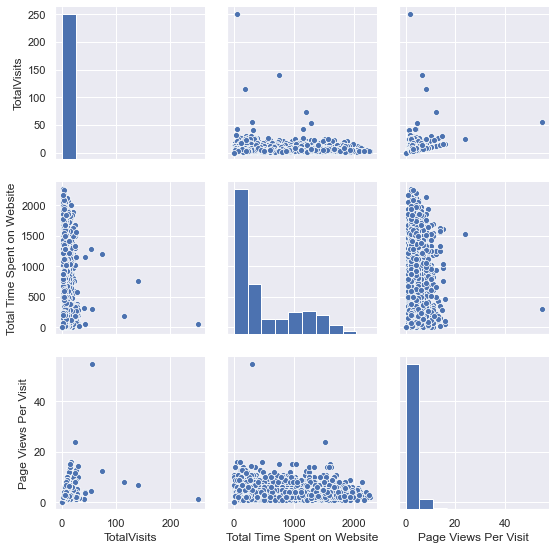

In [58]:
sns.pairplot(df[cont_cols])

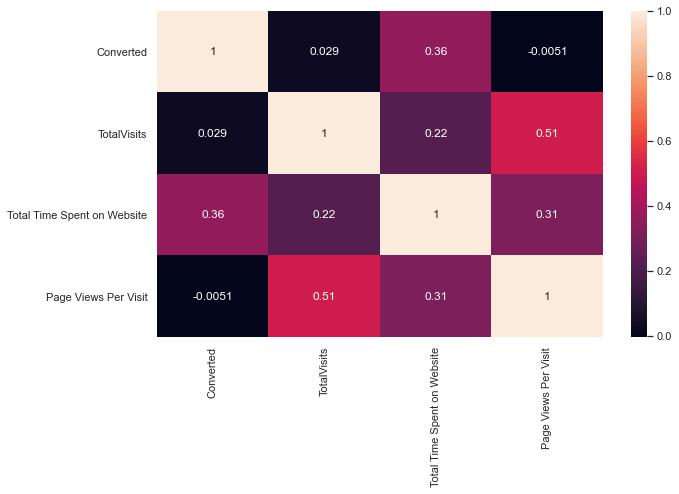

In [59]:
# Heat map
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [60]:
# As seen in the above graphs some columns are not having even data distribution, so dropping such columns.
df.drop(['What is your current occupation','Do Not Call','Do Not Email','Search','X Education Forums',
         'Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],axis = 1, inplace = True)

In [61]:
# There are some columns which have many categories, so we can categorize such less occuring categoroes as Other

# first let us set Others for column 'Lead Source' whose occurance is less than 1000
less_occuring_category_labels_dict = dict(df['Lead Source'].value_counts() < 1000)

for key in less_occuring_category_labels_dict.keys():
    if less_occuring_category_labels_dict[key]==True:
        df['Lead Source'] = df['Lead Source'].replace(key,'Other')

In [62]:
# let us set Others for column 'Last Activity' whose occurance is less than 300
less_occuring_category_labels_dict = dict(df['Last Activity'].value_counts() < 300)

for key in less_occuring_category_labels_dict.keys():
    if less_occuring_category_labels_dict[key]==True:
        df['Last Activity'] = df['Last Activity'].replace(key,'Other')

In [63]:
# let us set Others for column 'Last Notable Activity' whose occurance is less than 500
less_occuring_category_labels_dict = dict(df['Last Notable Activity'].value_counts() < 500)

for key in less_occuring_category_labels_dict.keys():
    if less_occuring_category_labels_dict[key]==True:
        df['Last Notable Activity'] = df['Last Notable Activity'].replace(key,'Other')

In [64]:
# let us set Others for column 'Specialization' whose occurance is less than 350
less_occuring_category_labels_dict = dict(df['Specialization'].value_counts() < 350)

for key in less_occuring_category_labels_dict.keys():
    if less_occuring_category_labels_dict[key]==True:
        df['Specialization'] = df['Specialization'].replace(key,'Other')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   City                                    9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null

## Data Preparation and Features Selection

In [66]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Mumbai,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Mumbai,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Mumbai,No,Modified


In [67]:
# Converting YS/NO vaues to 1/0 for column "A free copy of Mastering The Interview"

df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [68]:
# As columns "Last Notable Activity" and "Last Activity" have same values, we will drop the column "Last Notable Activity"
df.drop('Last Notable Activity', axis = 1, inplace = True)

In [69]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Mumbai,0
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,1
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Mumbai,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Mumbai,0


In [70]:
# Dummies creation

dum_cols=["Lead Origin", "Lead Source", "Last Activity", "Specialization", "City"]
dum = pd.get_dummies(df[dum_cols],drop_first=True)
df.drop(dum_cols, axis = 1, inplace = True)
df = pd.concat([df,dum],axis = 1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9240 non-null   int64  
 1   TotalVisits                               9240 non-null   float64
 2   Total Time Spent on Website               9240 non-null   int64  
 3   Page Views Per Visit                      9240 non-null   float64
 4   A free copy of Mastering The Interview    9240 non-null   int64  
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Google                        9240 non-null   uint8  
 10  Lead Source_Olark Chat       

### Splitting data into trian & test data sets

In [72]:
X = df.drop("Converted",axis=1)
y = df[["Converted"]]

In [73]:
# Splitting the data into 80% training and 20% testing

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [74]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
593802,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
600305,2.0,138,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
589724,2.0,79,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
616844,4.0,1579,4.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
585361,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [75]:
y_train.head()

,Converted
Lead Number,
593802,1
600305,0
589724,1
616844,0
585361,0


In [76]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (7392, 29)
Test X shape: (1848, 29)
Train y shape: (7392, 1)
Test y shape: (1848, 1)


In [77]:
# Scaling the numeric columns using standard scaler
scaler = StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]  = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])


### Feature selection 

In [78]:
# Number of columns to be used is 15
estimator = LogisticRegression()
selector = RFE(estimator,n_features_to_select = 15)
selector = selector.fit(X_train,y_train)
selector.support_

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [79]:
# Columns selected by RFE
cols_to_keep = X_train.columns[selector.support_]

In [80]:
# Below columns will be used for modeling
cols_to_keep

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Other',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Finance Management'],
      dtype='object')

In [81]:
# Below columns will not be used for modeling
X_train.columns[~selector.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Organic Search',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities'],
      dtype='object')

In [82]:
# Using only the columns that are selected by RFE
X_train = X_train[cols_to_keep]

## Model building

### Model 1

In [83]:
X_train_sm = sm.add_constant(X_train,has_constant="add")


In [84]:
X_train_sm

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management
Lead Number,,,,,,,,,,,,,,,,
593802,1.0,-0.884942,0,0,0,0,0,1,0,0,1,0,0,0,0,1
600305,1.0,-0.632201,1,0,0,0,0,0,0,0,0,0,0,0,1,0
589724,1.0,-0.740257,1,0,0,0,0,0,0,0,0,0,0,0,1,0
616844,1.0,2.006923,1,0,0,0,1,0,0,0,0,0,0,0,1,0
585361,1.0,-0.884942,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656685,1.0,-0.884942,0,1,0,0,1,0,0,0,1,0,0,0,0,0
659710,1.0,0.406233,0,1,0,0,0,0,1,0,1,0,0,0,0,0
588165,1.0,-0.884942,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [85]:
y_train

,Converted
Lead Number,
593802,1
600305,0
589724,1
616844,0
585361,0
...,...
656685,1
659710,1
588165,1


In [86]:
model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3338.2
Date:                Mon, 14 Nov 2022   Deviance:                       6676.3
Time:                        19:49:56   Pearson chi2:                 7.46e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9084      0.209     -9.140      0.000      -2.318      -1.499
Total Time Spent on Website               1.1116      0.036     31.166      0.000       1.042       1.181
Lead Origin_Landing Page Submission      -0.4725      0.096     -4.939      0.000      -0.660      -0.285
Lead Origin_Lead Add Form                 3.6501      0.266     13.729      0.000       3.129       4.171
Lead Origin_Lead Import                  -0.2109      0.480     -0.439      0.660      -1.152       0.730
Lead Origin_Quick Add Form               19.6942   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                        0.2332      0.073      3.185      0.001       0.090       0.377
Lead Source_Olark Chat                    1.1321      0.120      9.413      0.000       0.896       1.368
Lead Source_Other                         0.2201      0.230      0.959      0.338      -0.230       0.670
Last Activity_Email Bounced              -0.9827      0.342     -2.876      0.004      -1.652      -0.313
Last Activity_Email Opened                1.2284      0.193      6.371      0.000       0.850       1.606
Last Activity_Olark Chat Conversation    -0.3229      0.237     -1.362      0.173      -0.787       0.142
Last Activity_Other                       0.9623      0.223      4.324      0.000       0.526       1.398
Last Activity_Page Visited on Website     0.4971      0.223      2.224      0.026       0.059       0.935
Last Activity_SMS Sent                    2.2773      0.194     11.740      0.000       1.897       2.658
Specialization_Finance Management        -0.5548      0.079     -7.022      0.000      -0.710      -0.400
=========================================================================================================
"""

In [87]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Source_Other,5.05
2,Lead Origin_Lead Add Form,4.65
9,Last Activity_Email Opened,4.04
1,Lead Origin_Landing Page Submission,3.99
13,Last Activity_SMS Sent,3.46
6,Lead Source_Olark Chat,2.79
14,Specialization_Finance Management,2.67
10,Last Activity_Olark Chat Conversation,2.16
5,Lead Source_Google,1.87
11,Last Activity_Other,1.53


#### As p value for "Lead Origin_Quick Add Form" is high we will drop this column

In [88]:
X_train_sm = X_train_sm.drop(["Lead Origin_Quick Add Form"],axis=1)

### Model 2



In [89]:
model2 = sm.GLM(y_train ,X_train_sm, family = sm.families.Binomial())
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3338.5
Date:                Mon, 14 Nov 2022   Deviance:                       6677.0
Time:                        19:49:56   Pearson chi2:                 7.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9071      0.209     -9.133      0.000      -2.316      -1.498
Total Time Spent on Website               1.1124      0.036     31.204      0.000       1.043       1.182
Lead Origin_Landing Page Submission      -0.4747      0.096     -4.964      0.000      -0.662      -0.287
Lead Origin_Lead Add Form                 3.6485      0.266     13.726      0.000       3.128       4.169
Lead Origin_Lead Import                  -0.2116      0.480     -0.441      0.659      -1.153       0.730
Lead Source_Google                        0.2339      0.073      3.194      0.001       0.090       0.377
Lead Source_Olark Chat                    1.1323      0.120      9.414      0.000       0.897       1.368
Lead Source_Other                         0.2206      0.230      0.961      0.337      -0.229       0.671
Last Activity_Email Bounced              -0.9593      0.338     -2.838      0.005      -1.622      -0.297
Last Activity_Email Opened                1.2286      0.193      6.371      0.000       0.851       1.607
Last Activity_Olark Chat Conversation    -0.3227      0.237     -1.361      0.173      -0.787       0.142
Last Activity_Other                       0.9625      0.223      4.324      0.000       0.526       1.399
Last Activity_Page Visited on Website     0.4971      0.224      2.224      0.026       0.059       0.935
Last Activity_SMS Sent                    2.2778      0.194     11.741      0.000       1.898       2.658
Specialization_Finance Management        -0.5563      0.079     -7.042      0.000      -0.711      -0.401
=========================================================================================================
"""

In [90]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.15
9,Last Activity_Email Opened,5.81
13,Last Activity_SMS Sent,5.35
7,Lead Source_Other,4.64
3,Lead Origin_Lead Add Form,4.29
10,Last Activity_Olark Chat Conversation,3.25
2,Lead Origin_Landing Page Submission,2.53
6,Lead Source_Olark Chat,2.41
12,Last Activity_Page Visited on Website,2.35
11,Last Activity_Other,2.24


### As p value for "Lead Origin_Lead Import" is high we will drop this column

In [91]:
X_train_sm = X_train_sm.drop(["Lead Origin_Lead Import"],axis=1)

### Model 3

In [92]:
model3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3338.6
Date:                Mon, 14 Nov 2022   Deviance:                       6677.2
Time:                        19:49:57   Pearson chi2:                 7.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9079      0.209     -9.136      0.000      -2.317      -1.499
Total Time Spent on Website               1.1132      0.036     31.256      0.000       1.043       1.183
Lead Origin_Landing Page Submission      -0.4721      0.095     -4.946      0.000      -0.659      -0.285
Lead Origin_Lead Add Form                 3.6931      0.247     14.938      0.000       3.208       4.178
Lead Source_Google                        0.2340      0.073      3.196      0.001       0.090       0.378
Lead Source_Olark Chat                    1.1351      0.120      9.448      0.000       0.900       1.371
Lead Source_Other                         0.1764      0.208      0.848      0.396      -0.231       0.584
Last Activity_Email Bounced              -0.9632      0.338     -2.848      0.004      -1.626      -0.300
Last Activity_Email Opened                1.2266      0.193      6.362      0.000       0.849       1.605
Last Activity_Olark Chat Conversation    -0.3229      0.237     -1.362      0.173      -0.788       0.142
Last Activity_Other                       0.9624      0.223      4.324      0.000       0.526       1.399
Last Activity_Page Visited on Website     0.4967      0.224      2.222      0.026       0.059       0.935
Last Activity_SMS Sent                    2.2756      0.194     11.733      0.000       1.895       2.656
Specialization_Finance Management        -0.5562      0.079     -7.041      0.000      -0.711      -0.401
=========================================================================================================
"""

### As p value for "Lead Source_Other" is high we will drop this column

In [93]:
X_train_sm = X_train_sm.drop(["Lead Source_Other"],axis=1)

### Model 4

In [94]:
model4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3338.9
Date:                Mon, 14 Nov 2022   Deviance:                       6677.9
Time:                        19:49:57   Pearson chi2:                 7.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8863      0.207     -9.107      0.000      -2.292      -1.480
Total Time Spent on Website               1.1120      0.036     31.257      0.000       1.042       1.182
Lead Origin_Landing Page Submission      -0.4872      0.094     -5.196      0.000      -0.671      -0.303
Lead Origin_Lead Add Form                 3.8360      0.182     21.026      0.000       3.478       4.194
Lead Source_Google                        0.2201      0.071      3.085      0.002       0.080       0.360
Lead Source_Olark Chat                    1.1106      0.117      9.532      0.000       0.882       1.339
Last Activity_Email Bounced              -0.9724      0.339     -2.872      0.004      -1.636      -0.309
Last Activity_Email Opened                1.2288      0.193      6.377      0.000       0.851       1.607
Last Activity_Olark Chat Conversation    -0.3204      0.237     -1.352      0.176      -0.785       0.144
Last Activity_Other                       0.9666      0.222      4.345      0.000       0.531       1.403
Last Activity_Page Visited on Website     0.4990      0.223      2.233      0.026       0.061       0.937
Last Activity_SMS Sent                    2.2747      0.194     11.734      0.000       1.895       2.655
Specialization_Finance Management        -0.5554      0.079     -7.033      0.000      -0.710      -0.401
=========================================================================================================
"""

### As p value for "Last Activity_Olark Chat Conversation" is high > 0.05 we will drop this column

In [95]:
X_train_sm = X_train_sm.drop(["Last Activity_Olark Chat Conversation"],axis=1)

### Model 5

In [96]:
model5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7380
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3339.8
Date:                Mon, 14 Nov 2022   Deviance:                       6679.7
Time:                        19:49:57   Pearson chi2:                 7.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0894      0.148    -14.089      0.000      -2.380      -1.799
Total Time Spent on Website               1.1126      0.036     31.242      0.000       1.043       1.182
Lead Origin_Landing Page Submission      -0.4861      0.094     -5.181      0.000      -0.670      -0.302
Lead Origin_Lead Add Form                 3.8304      0.182     21.008      0.000       3.473       4.188
Lead Source_Google                        0.2173      0.071      3.045      0.002       0.077       0.357
Lead Source_Olark Chat                    1.0878      0.115      9.443      0.000       0.862       1.314
Last Activity_Email Bounced              -0.7652      0.304     -2.514      0.012      -1.362      -0.169
Last Activity_Email Opened                1.4378      0.122     11.830      0.000       1.200       1.676
Last Activity_Other                       1.1762      0.164      7.162      0.000       0.854       1.498
Last Activity_Page Visited on Website     0.7046      0.168      4.185      0.000       0.375       1.034
Last Activity_SMS Sent                    2.4826      0.124     19.955      0.000       2.239       2.726
Specialization_Finance Management        -0.5578      0.079     -7.061      0.000      -0.713      -0.403
=========================================================================================================
"""

In [97]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.68
7,Last Activity_Email Opened,2.42
2,Lead Origin_Landing Page Submission,2.41
10,Last Activity_SMS Sent,2.41
5,Lead Source_Olark Chat,2.10
11,Specialization_Finance Management,1.64
3,Lead Origin_Lead Add Form,1.53
9,Last Activity_Page Visited on Website,1.47
8,Last Activity_Other,1.38
4,Lead Source_Google,1.27


#### P value for all columns is < 0.05 and also VIF < 5. So we can consider model 5 as final model

### Model Evalution

In [98]:
y_train_pred = result5.predict(X_train_sm)

In [99]:
y_train_pred.head()

Lead Number
593802    0.248574
600305    0.310815
589724    0.285664
616844    0.913521
585361    0.072832
dtype: float64

In [100]:
y_train_pred_final = pd.DataFrame(y_train_pred,columns=["Converted_prob"])
y_train_pred_final["Converted"] = y_train["Converted"]
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final["Converted_class"]=np.where(y_train_pred_final["Converted_prob"] > 0.5,1,0) # Taking 0.5 cutoff
y_train_pred_final = y_train_pred_final.dropna()

In [101]:
y_train_pred_final.head()

,Converted_prob,Converted,Lead Number,Converted_class
0,0.248574,1,593802,0
1,0.310815,0,600305,0
2,0.285664,1,589724,0
3,0.913521,0,616844,1
4,0.072832,0,585361,0


In [102]:
# Calculating the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [103]:
# Calculating Accuracy, Sensitivity, specificityprecision, Recall Score
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_class)
precision = metrics.precision_score(y_train_pred_final["Converted"], y_train_pred_final["Converted_class"])
recall = metrics.recall_score(y_train_pred_final["Converted"], y_train_pred_final["Converted_class"])
print('Accuracy = {}\nSensitivity = {}\nspecificity = {} '.format(acc,sensi,speci))
print(f"Precision = {precision}\nRecall = {recall}")

Accuracy = 0.792478354978355
Sensitivity = 0.6405090137857901
specificity = 0.8866973482358098 
Precision = 0.7780163160154573
Recall = 0.6405090137857901


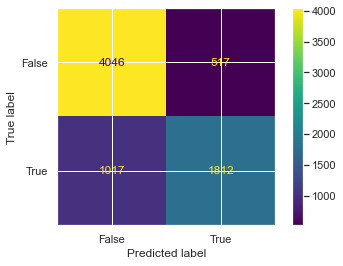

In [104]:
# Plotting the Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["Converted_class"])
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
display.plot()
plt.show()

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_class )
confusion

array([[4046,  517],
       [1017, 1812]], dtype=int64)

In [106]:
# Calculating TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [107]:
# Calculate false postive rate -
print(FP / float(TN + FP))

0.11330265176419023


In [108]:
# Calculate positive predictive value 
print (TP / float(TP + FP))

0.7780163160154573


In [109]:
# Calculate Negative predictive value
print (TN / float(TN + FN))

0.7991309500296268


In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

    return None

In [111]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

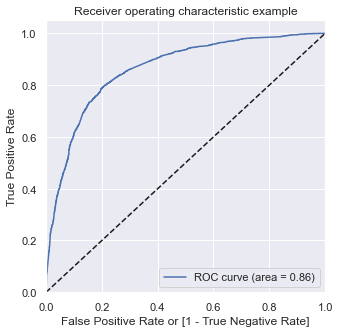

In [112]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Calculating optimal Point

In [113]:

# Creating columns with probability cutoffs between 0 and 0.9
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_prob,Converted,Lead Number,Converted_class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.248574,1,593802,0,1,1,1,0,0,0,0,0,0,0
1,0.310815,0,600305,0,1,1,1,1,0,0,0,0,0,0
2,0.285664,1,589724,0,1,1,1,0,0,0,0,0,0,0
3,0.913521,0,616844,1,1,1,1,1,1,1,1,1,1,1
4,0.072832,0,585361,0,1,0,0,0,0,0,0,0,0,0


In [114]:
# Calculating sensitivity and specificity for various above probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.382711     1.000000     0.000000
0.1   0.1  0.569670     0.972782     0.319746
0.2   0.2  0.698458     0.920113     0.561034
0.3   0.3  0.778815     0.830329     0.746877
0.4   0.4  0.798566     0.750088     0.828622
0.5   0.5  0.792478     0.640509     0.886697
0.6   0.6  0.781656     0.569459     0.913215
0.7   0.7  0.755005     0.458112     0.939075
0.8   0.8  0.730790     0.355956     0.963182
0.9   0.9  0.677083     0.176034     0.987727


<Figure size 1440x1080 with 0 Axes>

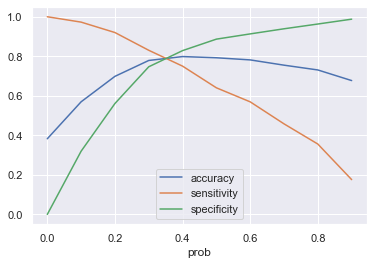

In [115]:
# plot accuracy sensitivity and specificity for various above probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

plt.show()

In [116]:
# Using 0.35 as the cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0) 
y_train_pred_final.head()

,Converted_prob,Converted,Lead Number,Converted_class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.248574,1,593802,0,1,1,1,0,0,0,0,0,0,0,0
1,0.310815,0,600305,0,1,1,1,1,0,0,0,0,0,0,0
2,0.285664,1,589724,0,1,1,1,0,0,0,0,0,0,0,0
3,0.913521,0,616844,1,1,1,1,1,1,1,1,1,1,1,1
4,0.072832,0,585361,0,1,0,0,0,0,0,0,0,0,0,0


In [117]:
# Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specificity {}  '.format(acc,sensi,speci))

Accuracy: 0.7938311688311688, Sensitivity 0.7974549310710498, specificity 0.7915844838921762  


In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_class )
confusion

array([[4046,  517],
       [1017, 1812]], dtype=int64)

In [119]:
# Calculating precision, Recall Score
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

print(f"\nPrecision = {precision}\nRecall = {recall}")


Precision = 0.7034611786716558
Recall = 0.7974549310710498


In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

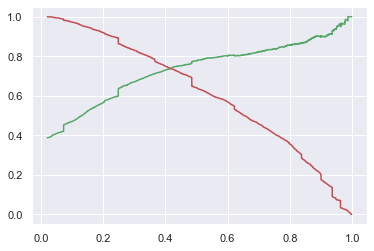

In [121]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')

plt.show()

## Prediction on test set

In [122]:
# Scaling the numeric continous column values
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [123]:
#Selecting the variables that were part of final model.
col1 = X_train_sm.columns

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm = X_test_lm[col1]
X_test_lm.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 619003 to 642343
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  1848 non-null   float64
 1   Total Time Spent on Website            1848 non-null   float64
 2   Lead Origin_Landing Page Submission    1848 non-null   uint8  
 3   Lead Origin_Lead Add Form              1848 non-null   uint8  
 4   Lead Source_Google                     1848 non-null   uint8  
 5   Lead Source_Olark Chat                 1848 non-null   uint8  
 6   Last Activity_Email Bounced            1848 non-null   uint8  
 7   Last Activity_Email Opened             1848 non-null   uint8  
 8   Last Activity_Other                    1848 non-null   uint8  
 9   Last Activity_Page Visited on Website  1848 non-null   uint8  
 10  Last Activity_SMS Sent                 1848 non-null   uint8  
 1

In [124]:
# Making predictions using the final model (X_test_lm)

y_test_pred = result5.predict(X_test_lm)

In [125]:
y_test_pred.head()

Lead Number
619003    0.713190
636884    0.935906
590281    0.173611
579892    0.072832
617929    0.899720
dtype: float64

In [126]:
y_train_pred_final.head()

,Converted_prob,Converted,Lead Number,Converted_class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.248574,1,593802,0,1,1,1,0,0,0,0,0,0,0,0
1,0.310815,0,600305,0,1,1,1,1,0,0,0,0,0,0,0
2,0.285664,1,589724,0,1,1,1,0,0,0,0,0,0,0,0
3,0.913521,0,616844,1,1,1,1,1,1,1,1,1,1,1,1
4,0.072832,0,585361,0,1,0,0,0,0,0,0,0,0,0,0


In [127]:
# Converting y_pred array to a dataframe
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [128]:
# Removing index for both dataframes to append them
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [130]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob
0,1,619003,0.713190
1,1,636884,0.935906
2,1,590281,0.173611
3,0,579892,0.072832
4,1,617929,0.899720


In [131]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [132]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob,final_test_predicted
0,1,619003,0.713190,1
1,1,636884,0.935906,1
2,1,590281,0.173611,0
3,0,579892,0.072832,0
4,1,617929,0.899720,1


In [133]:
y_train_pred_final.head()

,Converted_prob,Converted,Lead Number,Converted_class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.248574,1,593802,0,1,1,1,0,0,0,0,0,0,0,0
1,0.310815,0,600305,0,1,1,1,1,0,0,0,0,0,0,0
2,0.285664,1,589724,0,1,1,1,0,0,0,0,0,0,0,0
3,0.913521,0,616844,1,1,1,1,1,1,1,1,1,1,1,1
4,0.072832,0,585361,0,1,0,0,0,0,0,0,0,0,0,0


In [134]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob,final_test_predicted
0,1,619003,0.713190,1
1,1,636884,0.935906,1
2,1,590281,0.173611,0
3,0,579892,0.072832,0
4,1,617929,0.899720,1


In [135]:
# Calculating Accuracy, Sensitivity, specificityprecision, Recall Score

acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)
precision = precision_score(y_pred_final.Converted, y_pred_final.final_test_predicted)
recall = recall_score(y_pred_final.Converted, y_pred_final.final_test_predicted)
print("\nAccuracy, Sensitivity, specificity, precision, Recall Score for TEST data\n")
print('Accuracy = {}\nSensitivity = {}\nspecificity = {} '.format(acc,sensi,speci))
print(f"Precision = {precision}\nRecall = {recall}")


Accuracy, Sensitivity, specificity, precision, Recall Score for TEST data

Accuracy = 0.7873376623376623
Sensitivity = 0.796448087431694
specificity = 0.7813620071684588 
Precision = 0.7049576783555018
Recall = 0.796448087431694


In [136]:
# Calculating Accuracy, Sensitivity, specificityprecision, Recall Score

acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_class)
precision = metrics.precision_score(y_train_pred_final["Converted"], y_train_pred_final["Converted_class"])
recall = metrics.recall_score(y_train_pred_final["Converted"], y_train_pred_final["Converted_class"])
print("\nAccuracy, Sensitivity, specificity, precision, Recall Score for TRAIN data\n")
print('Accuracy = {}\nSensitivity = {}\nspecificity = {} '.format(acc,sensi,speci))
print(f"Precision = {precision}\nRecall = {recall}")


Accuracy, Sensitivity, specificity, precision, Recall Score for TRAIN data

Accuracy = 0.792478354978355
Sensitivity = 0.6405090137857901
specificity = 0.8866973482358098 
Precision = 0.7780163160154573
Recall = 0.6405090137857901


In [137]:

# When we compare scores of train and test data they look closer.


## Assigning Lead Score in the data frame with respect to Lead Number

In [138]:
# Calculating the lead score for each lead by creating a new dataframe.
lead_score_df = pd.DataFrame()
df1 = y_train_pred_final[['Lead Number','Converted_prob']]
df2 = y_pred_final[['Lead Number','Converted_prob']]

In [139]:
lead_score_df = df1.append(df2,ignore_index=True)

In [140]:
# Converting the lead score between 0 and 100
lead_score_df['Lead Score']=lead_score_df['Converted_prob'].apply(lambda x: round((x*100),2))

In [141]:
lead_score_df.head()

,Lead Number,Converted_prob,Lead Score
0,593802,0.248574,24.86
1,600305,0.310815,31.08
2,589724,0.285664,28.57
3,616844,0.913521,91.35
4,585361,0.072832,7.28


In [142]:
# Dropping Converted_prob
lead_score_df.drop('Converted_prob',1,inplace=True)
lead_score_df.head()

,Lead Number,Lead Score
0,593802,24.86
1,600305,31.08
2,589724,28.57
3,616844,91.35
4,585361,7.28


#### Model coefficients

In [143]:
print(result5.params)

const                                   -2.089413
Total Time Spent on Website              1.112630
Lead Origin_Landing Page Submission     -0.486099
Lead Origin_Lead Add Form                3.830382
Lead Source_Google                       0.217346
Lead Source_Olark Chat                   1.087835
Last Activity_Email Bounced             -0.765238
Last Activity_Email Opened               1.437755
Last Activity_Other                      1.176208
Last Activity_Page Visited on Website    0.704564
Last Activity_SMS Sent                   2.482606
Specialization_Finance Management       -0.557796
dtype: float64


### Conclusion

#### Below are the variables that contribute most in the probability of a lead getting converted
- Lead Origin_Lead Add Form
- Last Activity_SMS Sent
- Last Activity_Email Opened
- Last Activity_Other
- Total Time Spent on Website
- Lead Source_Olark Chat
- Last Activity_Page Visited on Website
- Lead Source_Google    